In [2]:
import Metrics

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Biblioteca para fazer a NORMALIZAÇÃO
from sklearn.preprocessing import MinMaxScaler

from sklearn.neural_network import MLPClassifier

from sklearn.cluster import KMeans

from imblearn.over_sampling import ADASYN

from imblearn.metrics import geometric_mean_score 

from sklearn.model_selection import ParameterGrid

In [54]:
#data = pd.read_csv('../Base de Dados/Dados_49_V.csv', na_values='?')

data = pd.read_csv('../Base de Dados/Dados_10_V_FISHER.csv', na_values='?')

print(data.shape)
data.head()

(2185, 11)


,inseminacao_2cat,total_animais_prop,teste_bruc,compra_repr,venda_repr,dest_leilao,vacina_semqqidade,piquete_parto,assist_vet,tipo_assist,resul_prop
0,0,15,0,0,0,0,0,0,0,-1,0
1,0,142,0,1,1,0,1,1,0,-1,0
2,0,40,0,1,1,0,-1,1,0,-1,0
3,0,68,0,1,0,0,1,0,0,-1,0
4,0,38,0,0,0,0,0,0,0,-1,0


In [55]:
# Gerando um DataFrame das variáveis preditoras originais SEM a variável TARGET
VAR_PREDITORAS_ORIG = data.drop('resul_prop', axis = 1)

# Gerando um DataFrame somente da variavel TARGET
VAR_TARGET = data['resul_prop']

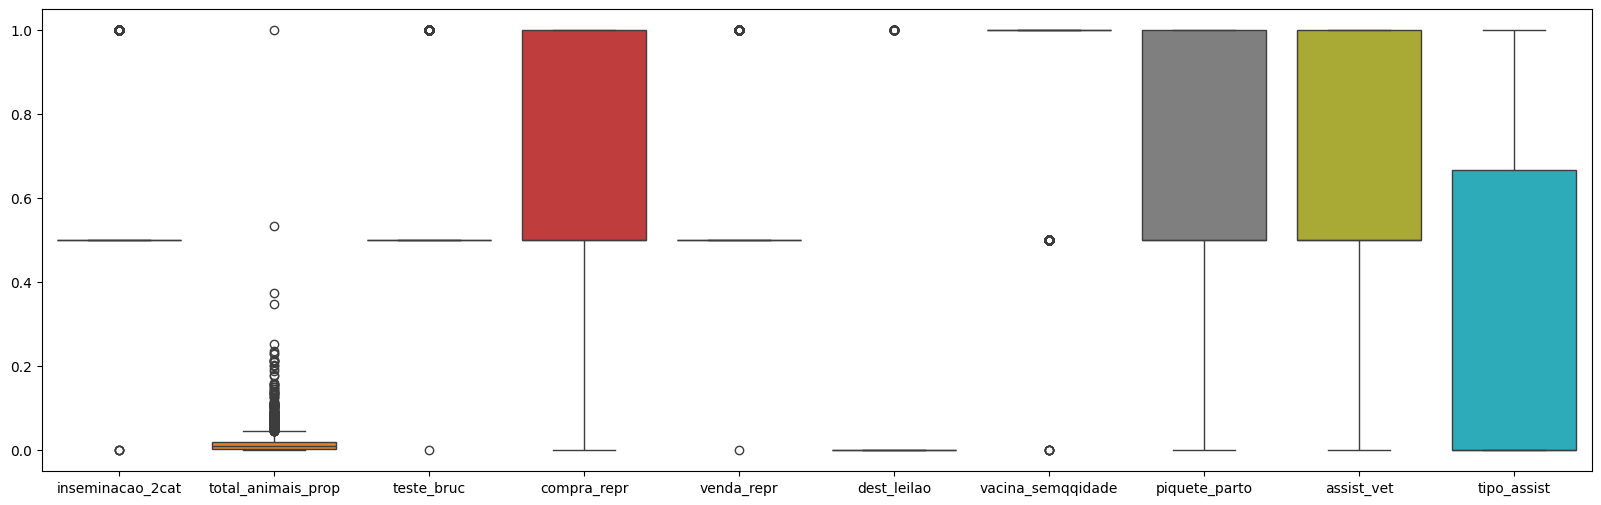

In [56]:
# Criando um objeto para NORMALIZAR os dados
obj_normalizacao = MinMaxScaler().fit(VAR_PREDITORAS_ORIG)

# Aplicando a NORMALIZAÇÃO
VAR_PREDITORAS_NORM = obj_normalizacao.transform(VAR_PREDITORAS_ORIG)

# Transformando para DataFrame e nomeando as colunas
VAR_PREDITORAS_NORM = pd.DataFrame(VAR_PREDITORAS_NORM)

VAR_PREDITORAS_NORM.columns = data.drop('resul_prop', axis = 1).columns

VAR_PREDITORAS_NORM

plt.figure(figsize=(20,6))
ax = sns.boxplot(data=VAR_PREDITORAS_NORM)

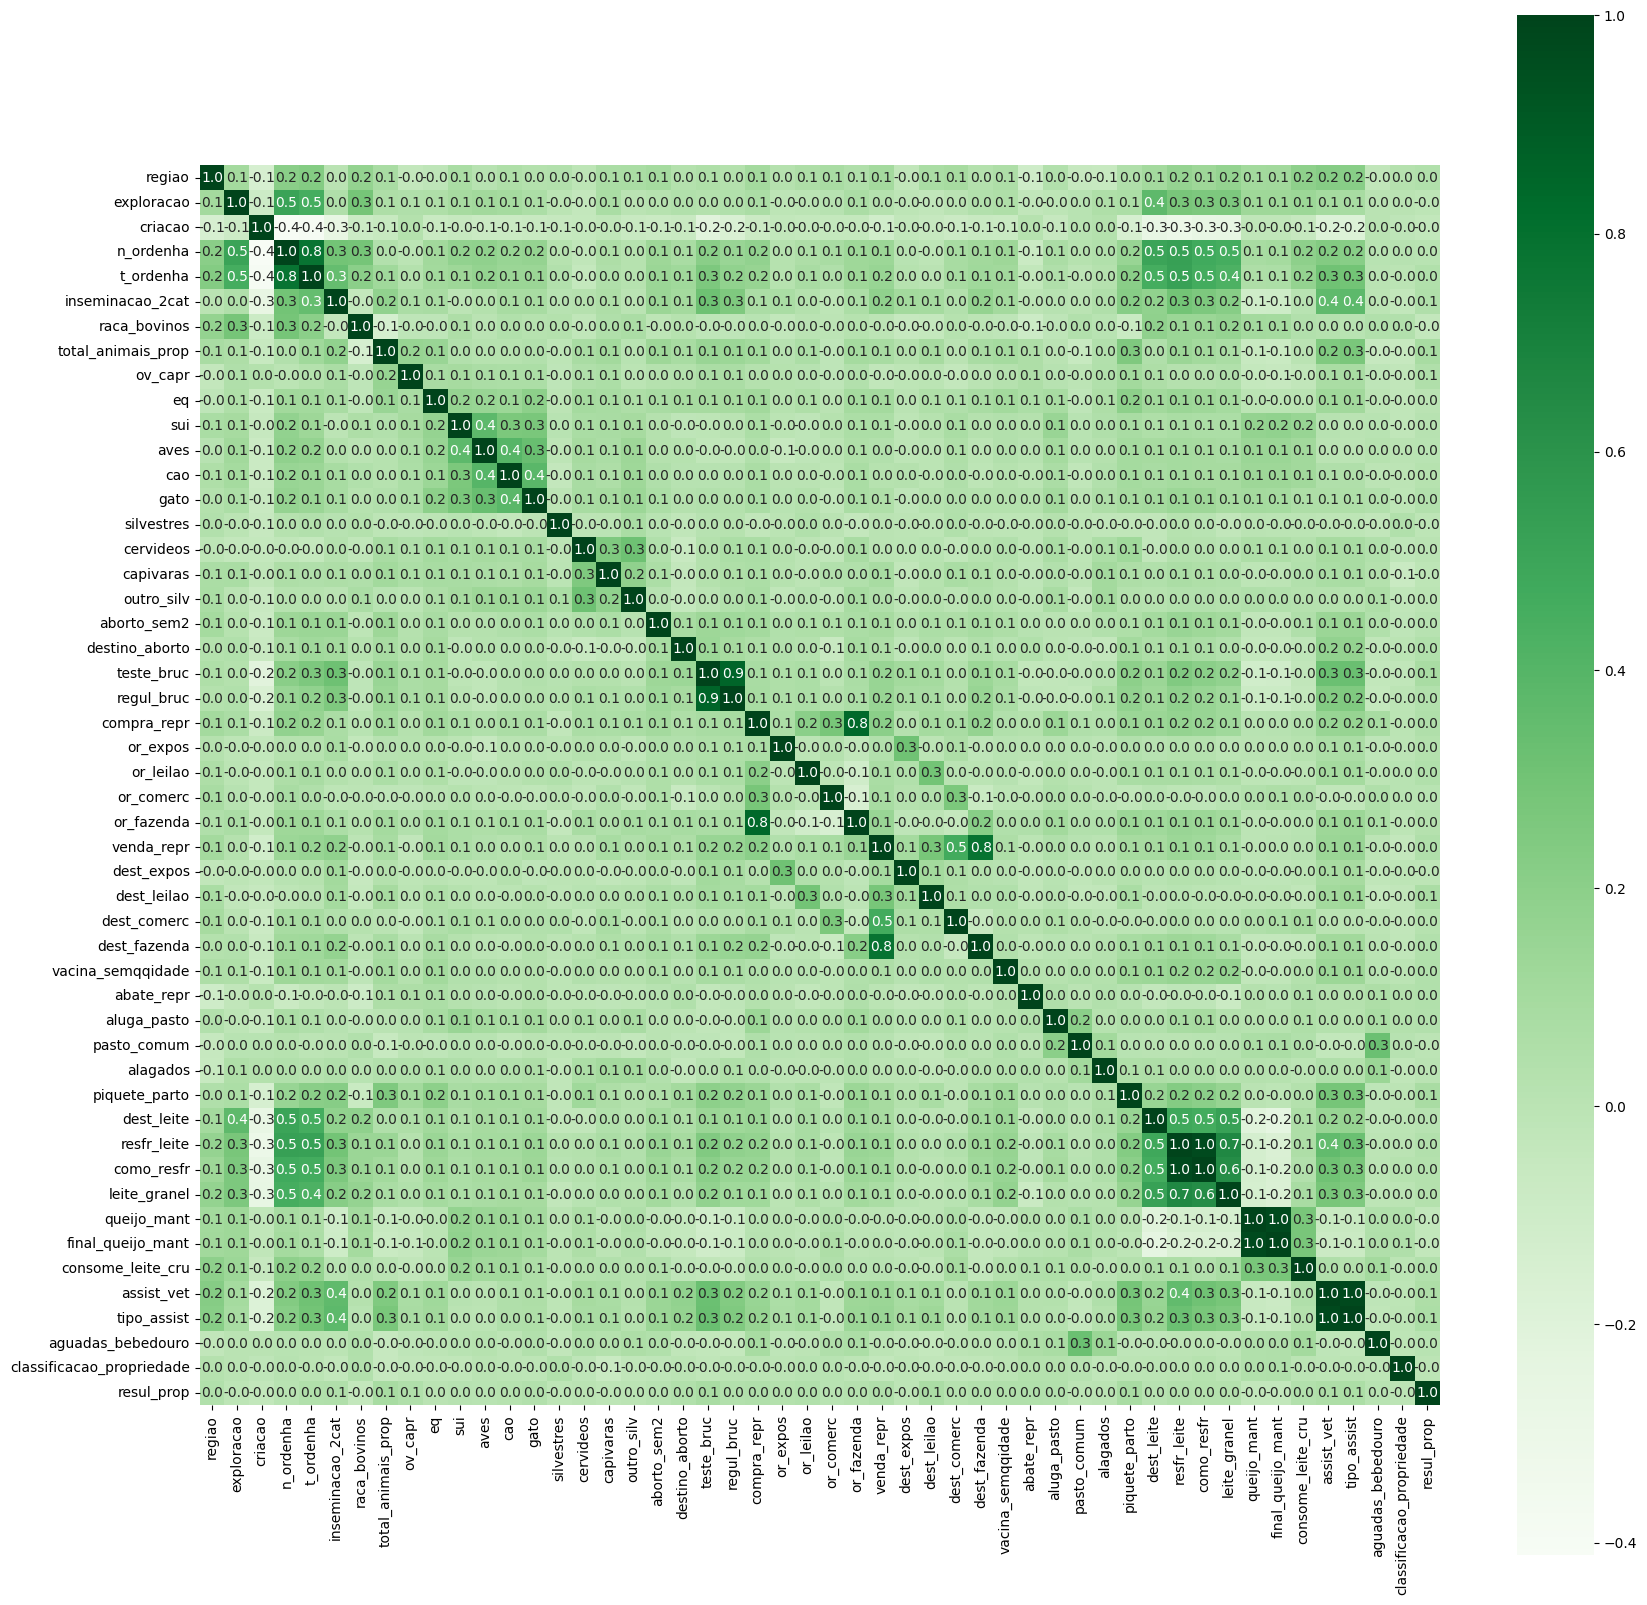

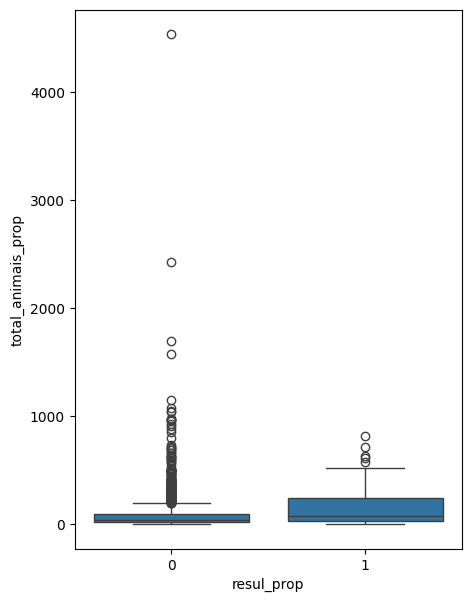

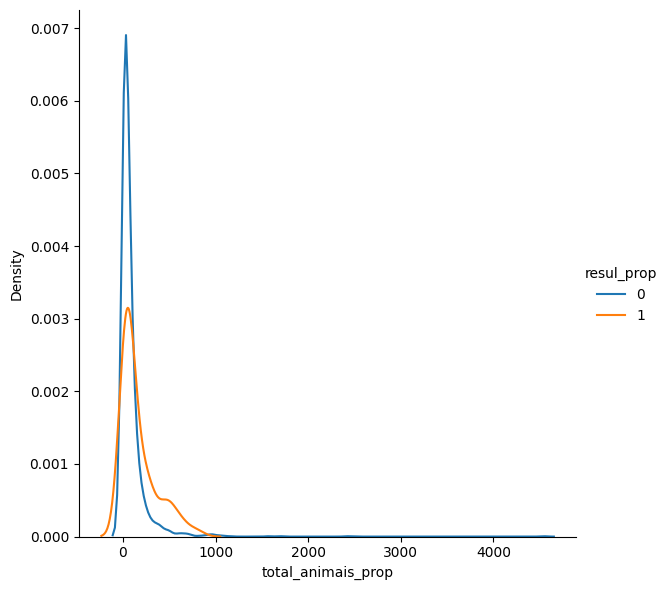

C:\Users\caiod\AppData\Local\Temp\ipykernel_19244\1478661703.py:15: FutureWarning:

Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.



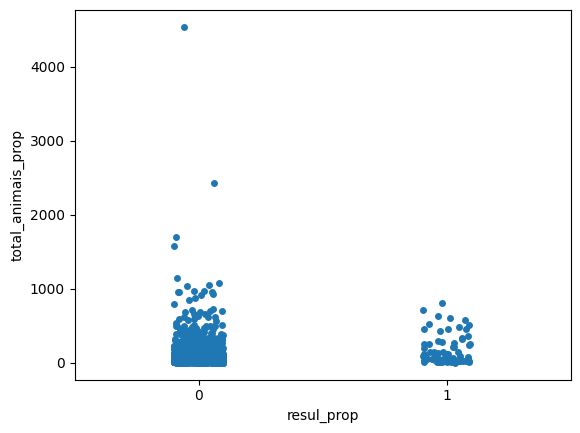

In [14]:
#DATA_NORM = VAR_PREDITORAS_NORM.assign(resul_prop=VAR_TARGET)

corr = data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap='Greens')
plt.show()

plt.figure(figsize=(5,7))
sns.boxplot(x="resul_prop", y="total_animais_prop", data=data)
plt.show()

sns.FacetGrid(data, hue="resul_prop", height=6).map(sns.kdeplot, "total_animais_prop").add_legend()
plt.show()

sns.stripplot(x="resul_prop", y="total_animais_prop", data=data, jitter=True, edgecolor="gray")
plt.show()

#sns.pairplot(data, hue="resul_prop", vars = ["total_animais_prop", "piquete_parto", "teste_bruc", "tipo_assist", "vacina_semqqidade", "assist_vet"])
#plt.show()

In [19]:
from sklearn.manifold import TSNE
import plotly.express as px

#data = pd.read_csv('../Base de Dados/Dados_49_V.csv', na_values='?')

data = pd.read_csv('../Base de Dados/Dados_10_V_FISHER.csv', na_values='?')

print(data.shape)
data.head()

tsne = TSNE(n_components=2, perplexity=6)
X_tsne = tsne.fit_transform(data.drop('resul_prop', axis = 1))
tsne.kl_divergence_

fig = px.scatter(x=X_tsne[:, 0], y=X_tsne[:, 1], color=data['resul_prop'], width=600, height=600)
fig.update_layout(
    title="t-SNE com "+str(data.shape[1]-1)+" variáveis",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE",
)
fig.show()

(2185, 11)
